100.0%


클래스: 6
이미지 shape: torch.Size([3, 32, 32])


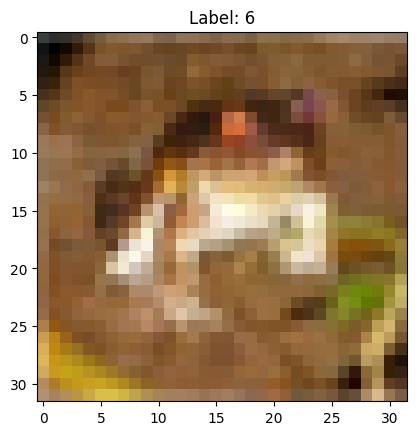

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# CIFAR-10 중 하나만 불러오자
transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 하나의 이미지만 확인
img, label = dataset[0]
print(f"클래스: {label}")
print(f"이미지 shape: {img.shape}")  # [3, 32, 32]

# 시각화
plt.imshow(img.permute(1, 2, 0))  # [채널, 높이, 너비] → [높이, 너비, 채널]
plt.title(f"Label: {label}")
plt.show()


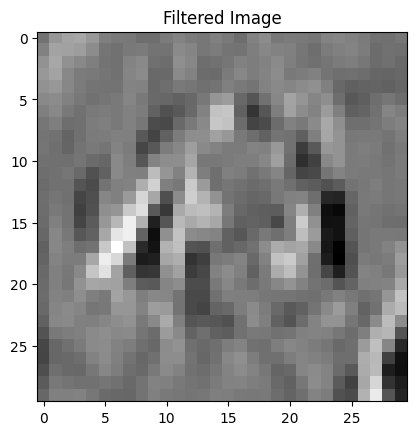

In [ ]:
import torch.nn.functional as F

def apply_filter(image, kernel):
    """3채널 이미지에 대해 동일 커널을 적용하고 결과 합산"""
    C, H, W = image.shape
    result = torch.zeros(H-2, W-2)
    for c in range(C):
        result += F.conv2d(image[c].unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0)).squeeze(0).squeeze(0)
    return result

# 필터(예: 수직 에지 검출용 Sobel 필터 비슷하게 시작)
kernel = torch.tensor([[-1., 0., 1.],
                       [-2., 0., 2.],
                       [-1., 0., 1.]])

# 필터 적용
out = apply_filter(img, kernel)
plt.imshow(out.detach().numpy(), cmap='gray')
plt.title("Filtered Image")
plt.show()


In [6]:
# 정답: 3(고양이)인 경우만 필터를 업데이트해본다
target_label = 3
learning_rate = 0.01

# 출력 평균값이 label 맞으면 올바른 출력이라고 가정하자
for epoch in range(10):
    img, label = dataset[epoch]
    out = apply_filter(img, kernel)
    score = out.mean()

    if label == target_label:
        loss = (score - 1) ** 2
        grad = 2 * (score - 1) / (32-2)**2  # 아주 단순한 그라디언트
    else:
        loss = (score - 0) ** 2
        grad = 2 * (score - 0) / (32-2)**2

    # 필터 업데이트
    kernel -= learning_rate * grad * torch.ones_like(kernel)

    print(f"Epoch {epoch+1}, Label={label}, Loss={loss.item():.4f}")


Epoch 1, Label=6, Loss=0.0006
Epoch 2, Label=9, Loss=0.0138
Epoch 3, Label=9, Loss=0.0122
Epoch 4, Label=4, Loss=0.0012
Epoch 5, Label=1, Loss=0.0031
Epoch 6, Label=1, Loss=0.0001
Epoch 7, Label=2, Loss=0.0000
Epoch 8, Label=7, Loss=0.0004
Epoch 9, Label=8, Loss=0.0060
Epoch 10, Label=3, Loss=1.3450
